### Ejecutamos lo siguiente para descargar el dataset.

In [ ]:
import urllib.request
import zipfile

# Descargar el archivo
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(url, "cats_and_dogs_filtered.zip")

# Descomprimir el archivo
with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as zip_ref:
    zip_ref.extractall()

### Preparamos los datos con ImageDataGenerator

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale =1./255)

train_dir = 'cats_and_dogs_filtered/train'
valid_dir = 'cats_and_dogs_filtered/validation'

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150,150),
    batch_size=20,
    class_mode='binary')

valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [2]:
# Los índices serán los siguientes
# Para las imágenes de gatos (0) y
# para las imágenes de perros (1)

train_gen.class_indices

{'cats': 0, 'dogs': 1}

1.0


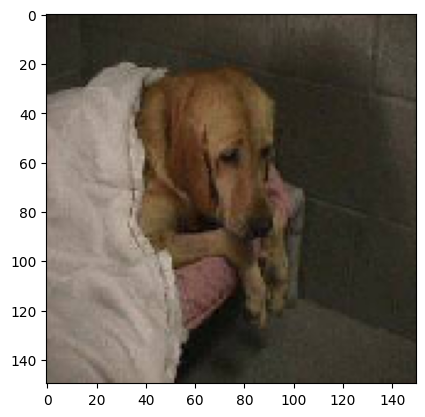

In [3]:
import matplotlib.pyplot as plt

batchX, batchY = next(train_gen)

plt.imshow(batchX[0])
print(batchY[0])

In [4]:
batchX.shape

(20, 150, 150, 3)

### Construimos y entrenamos el modelo

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [6]:
opt = RMSprop(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [7]:
hist = model.fit(train_gen, validation_data=valid_gen, epochs=30)

c:\Users\Juanlu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 623ms/step - accuracy: 0.5378 - loss: 0.6935 - val_accuracy: 0.5150 - val_loss: 0.6889
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 575ms/step - accuracy: 0.5978 - loss: 0.6793 - val_accuracy: 0.5440 - val_loss: 0.6684
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 568ms/step - accuracy: 0.6086 - loss: 0.6618 - val_accuracy: 0.6680 - val_loss: 0.6327
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 579ms/step - accuracy: 0.6673 - loss: 0.6250 - val_accuracy: 0.6630 - val_loss: 0.6129
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 649ms/step - accuracy: 0.6994 - loss: 0.5819 - val_accuracy: 0.6730 - val_loss: 0.5997
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 617ms/step - accuracy: 0.7054 - loss: 0.5565 - val_accuracy: 0.6950 - val_loss: 0.5725
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 548ms/step - accuracy: 0.7518 - loss: 0.5247 - val_accuracy: 0.7030 - val_loss: 0.5686
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 561ms/step - accuracy: 0.7526 - loss: 0

### Evaluamos

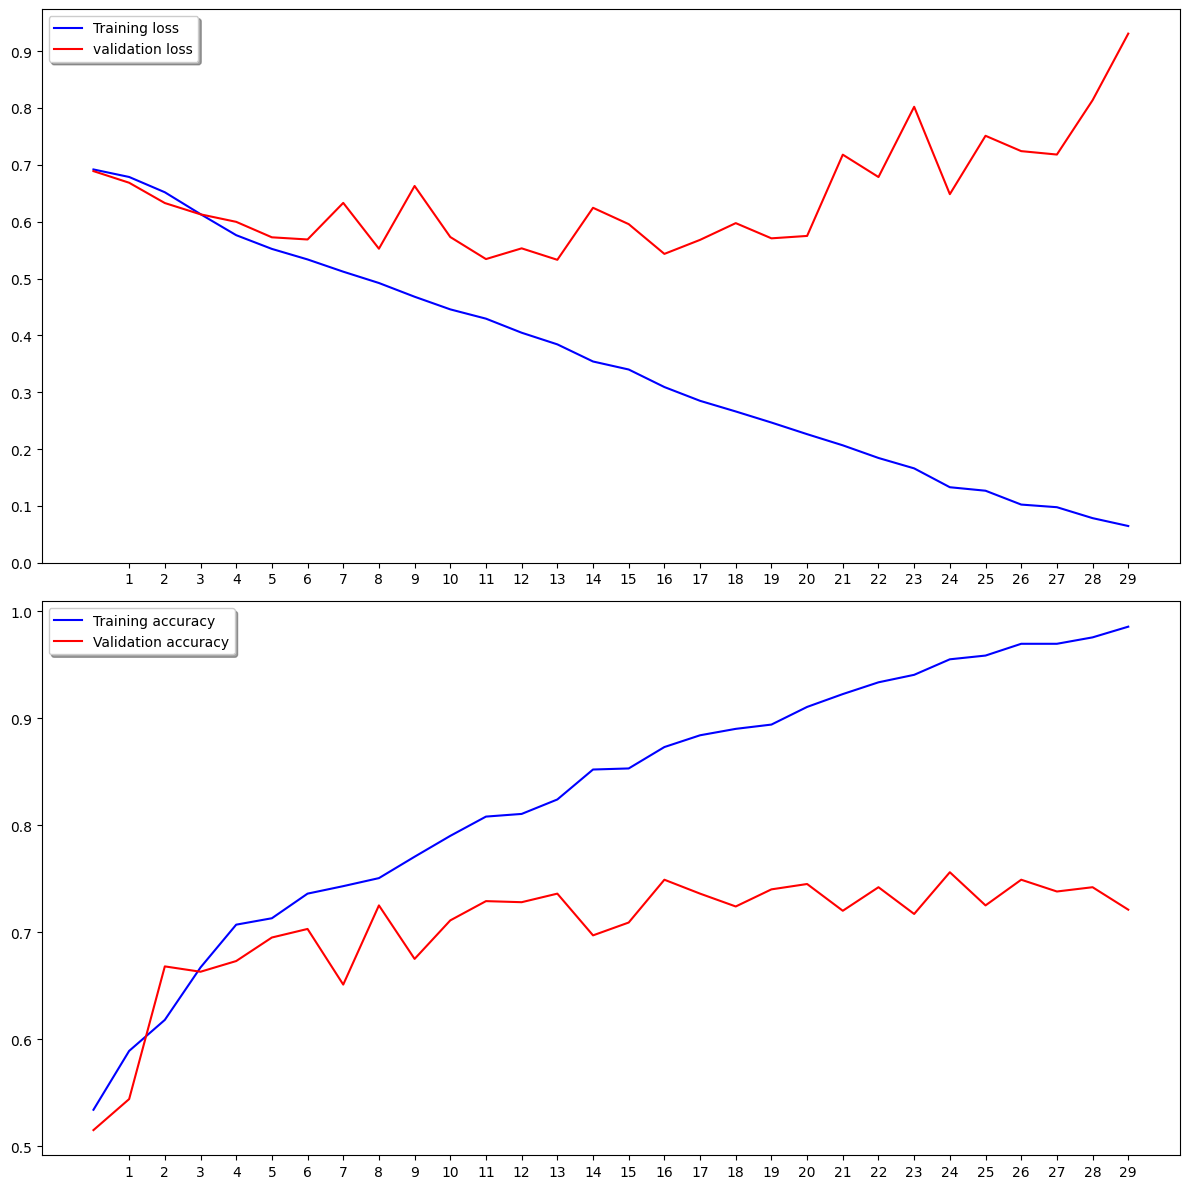

In [8]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 30, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend(loc='best', shadow=True)

ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 30, 1))
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Técnica de Dataset aumentado

Ya hemos visto que el overfitting puede ser evitado si contamos con un conjunto de datos lo mayor posible. Si modificamos las imágenes de forma que sigan siendo representativas, pero que para el modelo sean nuevas, le ayudaremos a generalizar mejor.

### Trucos para aumentar el dataset:

1.- Rotación entre 0 y 180 grados

2.- Cambios de altura o anchura

3.- Recortes

4.- Aumentos

5.- Simetrías

Tras las transformaciones, también es útil la funcionalidad de añadir pixeles de relleno en las zonas que quedan vacías.

## Nuevo modelo con dropout

Definimos ahora una nueva red neuronal convolucional, añadiendo dropout tras el bloque convolucional

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = RMSprop(learning_rate=0.0001)

model.compile(loss='binary_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

c:\Users\Juanlu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

valid_datagen = ImageDataGenerator(rescale =1./255)

train_dir = 'cats_and_dogs_filtered/train'
valid_dir = 'cats_and_dogs_filtered/validation'

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size= (150,150),
    batch_size=32,
    class_mode='binary')

valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
hist = model.fit(train_gen, validation_data=valid_gen, epochs=100)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 927ms/step - accuracy: 0.4902 - loss: 0.6950

c:\Users\Juanlu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.4903 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5138 - loss: 0.6907 - val_accuracy: 0.5780 - val_loss: 0.6839
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 884ms/step - accuracy: 0.5632 - loss: 0.6866 - val_accuracy: 0.5090 - val_loss: 0.6830
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 831ms/step - accuracy: 0.5334 - loss: 0.6881 - val_accuracy: 0.5890 - val_loss: 0.6686
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 984ms/step - accuracy: 0.5678 - loss: 0.6815 - val_accuracy: 0.5870 - val_loss: 0.6545
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 926ms/step - accuracy: 0.5553 - loss: 0.6775 - val_accuracy: 0.5040 - val_loss: 0.7370
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5864 - loss: 0.6665 - val_accuracy: 0.6000 - val_loss: 0.6475
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 987ms/step - accuracy: 0.5728 - loss: 0.6707 - val_accuracy: 0.5710 

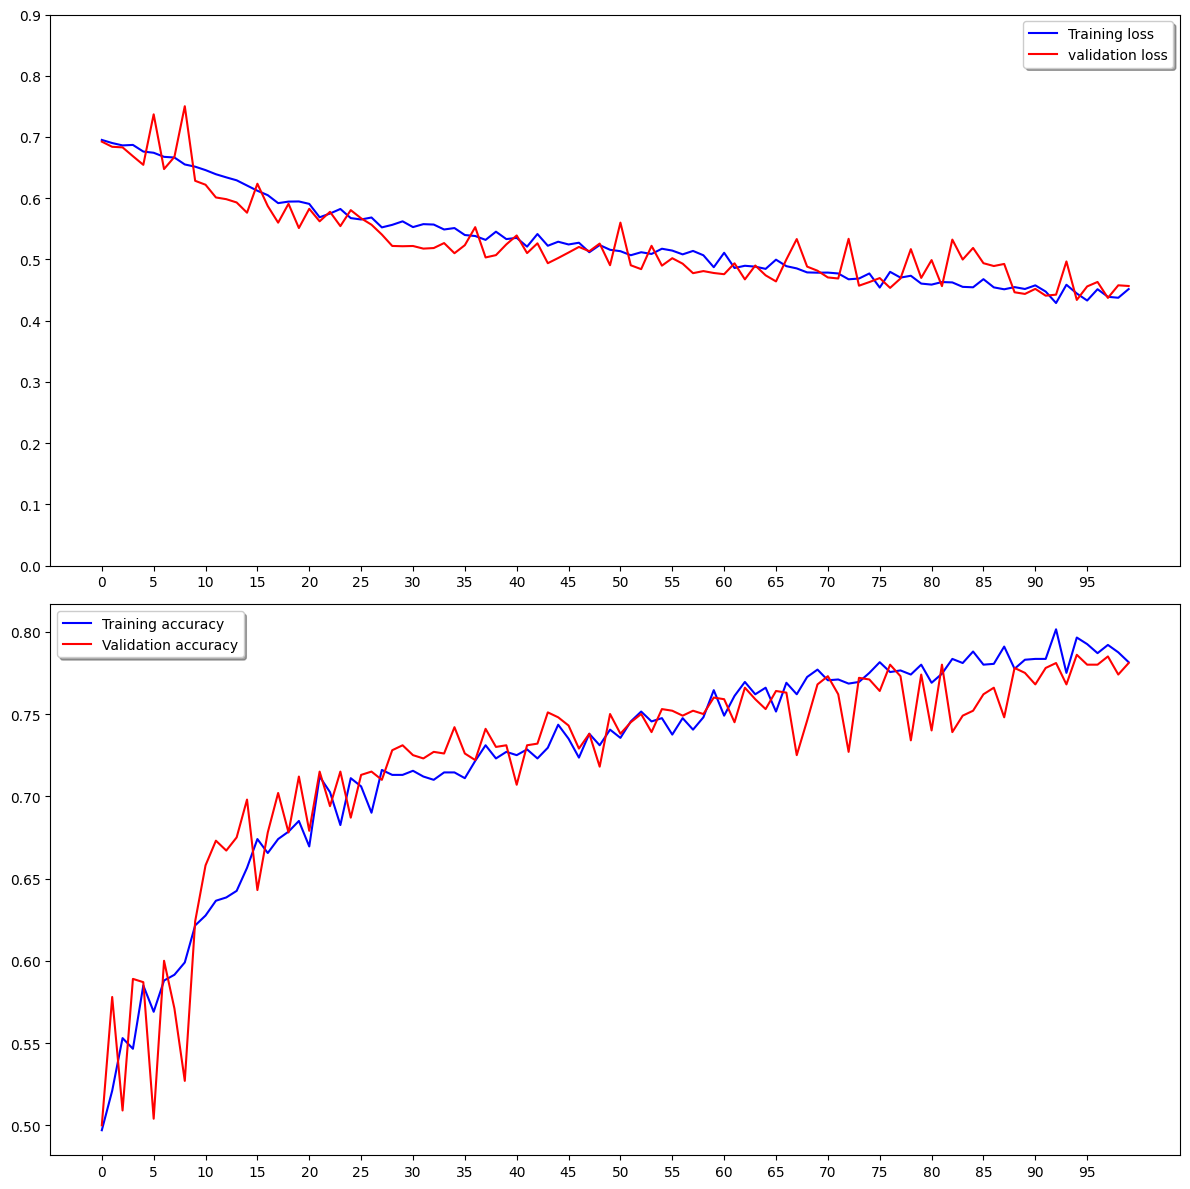

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(0, 100, 5))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend(loc='best', shadow=True)

ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy") 
ax2.set_xticks(np.arange(0, 100, 5))
ax2.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()